Two ways to impute numerical data:
1) Univariate
2) Multivariate

If we are using a single column to impute the data then it is univariate otherwise it is multivariate

### 1) Mean/Median imputation

If our distribution is normally distributed then use mean otherwise use median

Benefits:
1) Simple
2) Reliable when missing data < 5%

Disadvantages:
1) Messes with the distribution shape
2) Outliers
3) Changes correlation

Should be used when:
1) The data is MCAR
2) The missing data is less than 5%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.sample(3)

,Age,Fare,Family,Survived
603,44.0,8.0500,0,0
694,60.0,26.5500,0,0
843,34.5,6.4375,0,0


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
X=df.drop(columns='Survived')
y=df['Survived']

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [8]:
X_train.isnull().sum()

Age       134
Fare       37
Family      0
dtype: int64

In [9]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [10]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [11]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
160,44.0,16.1000,1,44.0,44.0,16.1000,16.100000
62,45.0,83.4750,1,45.0,45.0,83.4750,83.475000
860,41.0,NaN,2,41.0,41.0,14.4583,31.586265
280,65.0,7.7500,0,65.0,65.0,7.7500,7.750000
606,30.0,7.8958,0,30.0,30.0,7.8958,7.895800


Variance will always change/decrease when we impute using mean and median. this should not change by much

In [12]:
# now we have to see what changes have been done
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  211.0276134525316
Age Variance after median imputation:  171.47529143772027
Age Variance after mean imputation:  171.25588320971974
Original Fare variable variance:  2307.8252624219513
Fare Variance after median imputation:  2202.2007597529127
Fare Variance after mean imputation:  2187.7274639555485


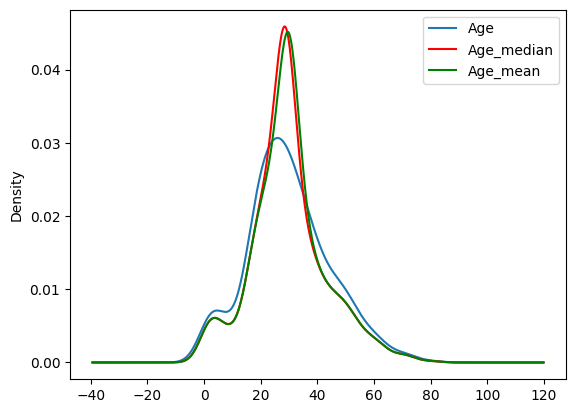

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

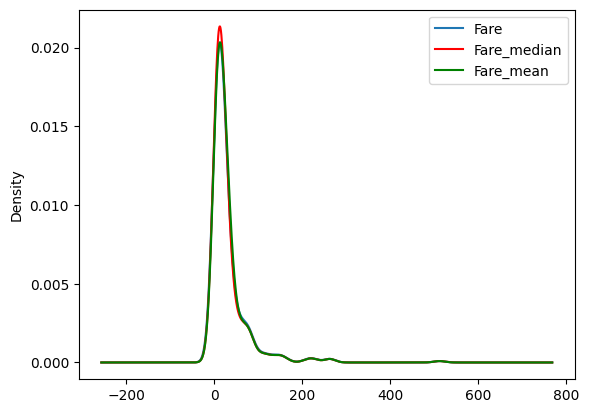

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
# check for covariance
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,211.027613,57.651307,-6.619643,211.027613,211.027613,53.678146,54.278712
Fare,57.651307,2307.825262,17.349790,48.548807,46.467088,2307.825262,2307.825262
Family,-6.619643,17.349790,2.668460,-5.363496,-5.372059,16.615209,16.446918
Age_median,211.027613,48.548807,-5.363496,171.475291,171.255883,45.449486,46.022357
Age_mean,211.027613,46.467088,-5.372059,171.255883,171.255883,43.561590,44.048969
Fare_median,53.678146,2307.825262,16.615209,45.449486,43.561590,2202.200760,2187.727464
Fare_mean,54.278712,2307.825262,16.446918,46.022357,44.048969,2187.727464,2187.727464


In [16]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.076839,-0.307520,1.000000,1.000000,0.073848,0.074971
Fare,0.076839,1.000000,0.217603,0.076904,0.073651,1.000000,1.000000
Family,-0.307520,0.217603,1.000000,-0.250736,-0.251297,0.216744,0.215257
Age_median,1.000000,0.076904,-0.250736,1.000000,0.999360,0.073960,0.075140
Age_mean,1.000000,0.073651,-0.251297,0.999360,1.000000,0.070934,0.071964
Fare_median,0.073848,1.000000,0.216744,0.073960,0.070934,1.000000,0.996708
Fare_mean,0.074971,1.000000,0.215257,0.075140,0.071964,0.996708,1.000000


Suddenly new outliers will appear due to imputation

<Axes: >

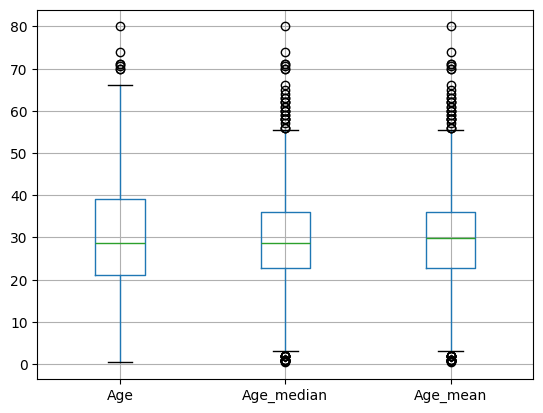

In [17]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

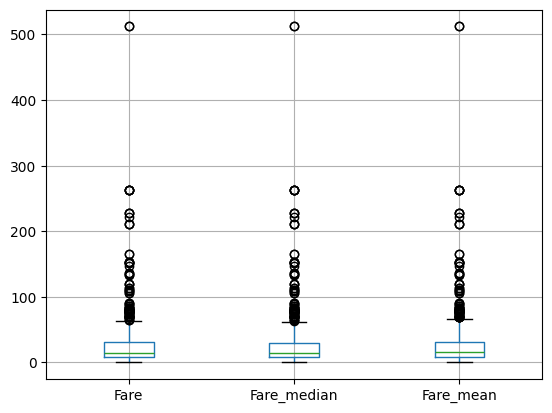

In [18]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Using sklearn for imputation

To transform the X_test data too

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [29]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder='passthrough', force_int_remainder_cols=False)

In [30]:
trf.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [31]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [32]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [33]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

### 2) Arbitrary Value imputation

Benefit: Very easy to apply

Disadvantage: Changes distribution, variance, correlation

This is used when we know that the data is not missing at random

In [35]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


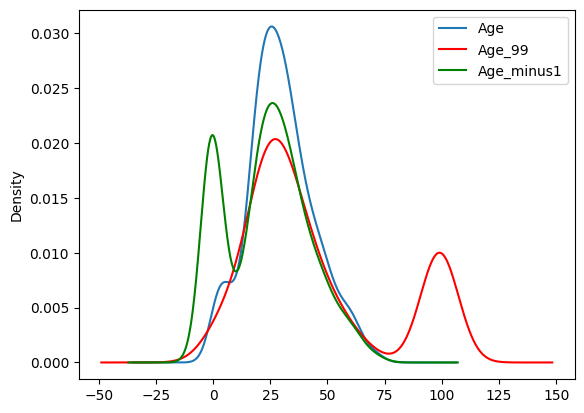

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

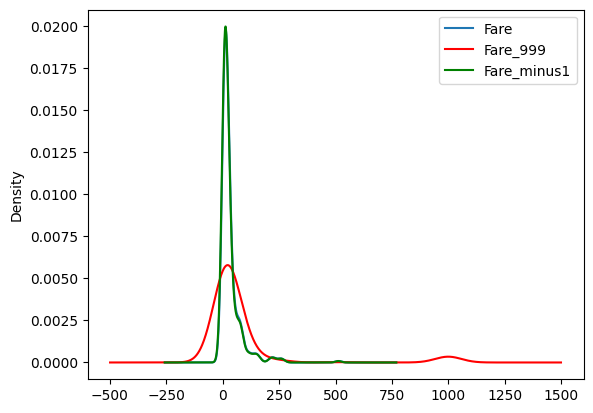

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [42]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [45]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder='passthrough', force_int_remainder_cols=False)

In [46]:
trf.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [47]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

### 3) End of distribution imputation

This is an extension of arbitrary value imputation. we can't easily find the value to impute so we use this

sigma=standard deviation
If the data is distributed normally: Use (mean+3*sigma) or (mean - 3*sigma) for imputation

q=quartiles
If it is not then use: (q1 + 1.5*iqr) or (q3-1.5*iqr) for imputation

Has the exact same advantages and disadvantages as arbitrary value imputation